# 94 - Denoising MRI images (also CT & microscopy images)


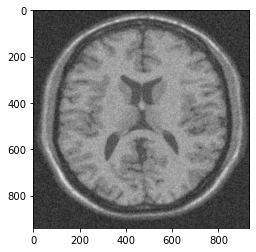

In [1]:
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage import io
from scipy import ndimage as nd


noisy_img = img_as_float(io.imread
            ("python_for_microscopists-master/images/MRI_images/MRI_noisy.tif"))
#Need to convert to float as we will be doing math on the array
plt.imshow(noisy_img, cmap = 'gray');


## Gaussian denoising filter

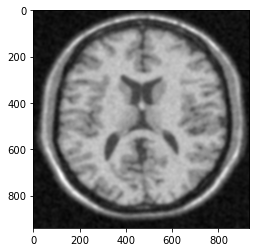

In [2]:
gaussian_img = nd.gaussian_filter(noisy_img, sigma=5)
plt.imshow(gaussian_img, cmap='gray');

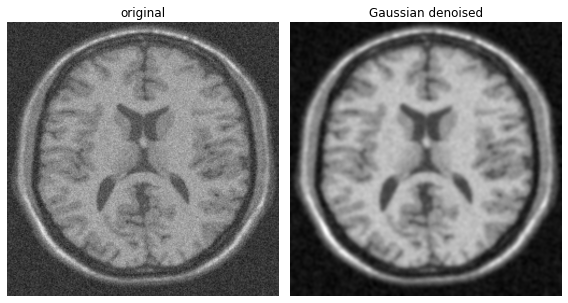

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')

ax[1].imshow(gaussian_img, cmap=plt.cm.gray)
ax[1].set_title('Gaussian denoised')

for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show();

## Bilateral denoise filter

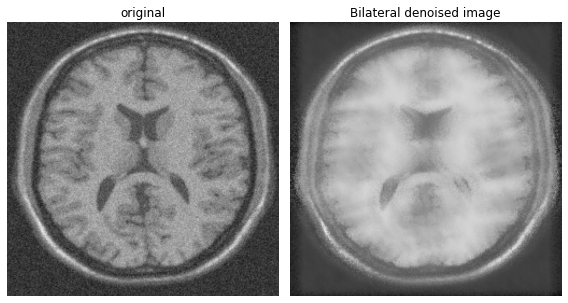

In [4]:
from skimage.restoration import (denoise_bilateral, estimate_sigma)

sigma_est = estimate_sigma(noisy_img, multichannel=True, average_sigmas=True)

denoise_bilateral = denoise_bilateral(noisy_img, sigma_spatial=15,
                multichannel=False)



fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()
ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[1].imshow(denoise_bilateral, cmap=plt.cm.gray)
ax[1].set_title('Bilateral denoised image')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();

## TV denoise filter

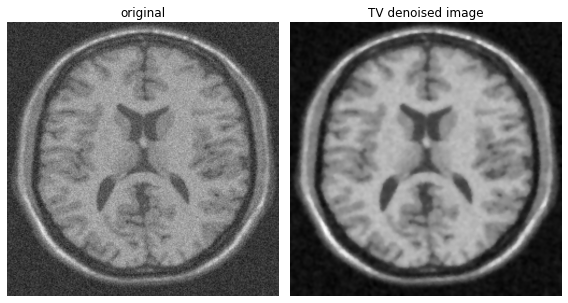

In [5]:
from skimage.restoration import (denoise_tv_chambolle)

denoise_TV = denoise_tv_chambolle(noisy_img, weight=0.3, multichannel=False)


fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()
ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[1].imshow(denoise_TV, cmap=plt.cm.gray)
ax[1].set_title('TV denoised image')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();

## Wavelet denoise filter

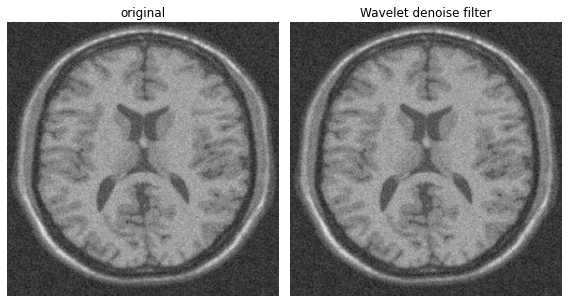

In [6]:
from skimage.restoration import (denoise_wavelet)

wavelet_smoothed = denoise_wavelet(noisy_img, multichannel=False,
                           method='BayesShrink', mode='soft',
                           rescale_sigma=True)


fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()
ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[1].imshow(wavelet_smoothed, cmap=plt.cm.gray)
ax[1].set_title('Wavelet denoise filter')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();

## Let's plot everything to compare the denoise filters

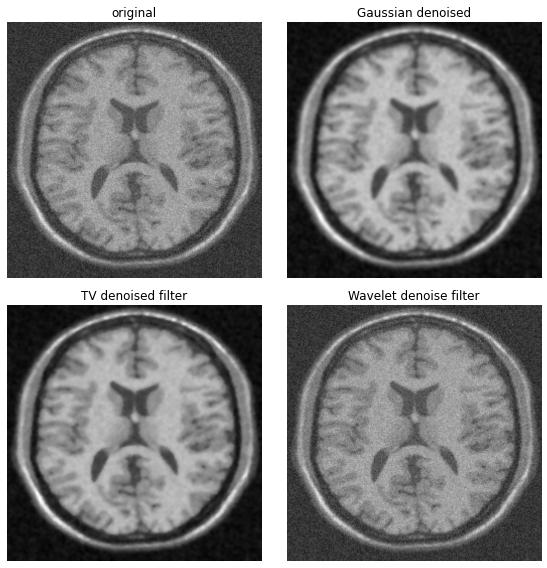

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')

ax[1].imshow(gaussian_img, cmap=plt.cm.gray)
ax[1].set_title('Gaussian denoised')

ax[2].imshow(denoise_TV, cmap=plt.cm.gray)
ax[2].set_title('TV denoised filter')

ax[3].imshow(wavelet_smoothed, cmap=plt.cm.gray)
ax[3].set_title('Wavelet denoise filter')

for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show();

## Shift invariant wavelet denoising

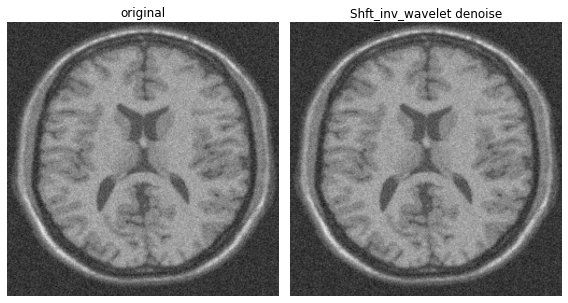

In [8]:
from skimage.restoration import denoise_wavelet, cycle_spin

denoise_kwargs = dict(multichannel=False, wavelet='db1', method='BayesShrink',
                      rescale_sigma=True)

all_psnr = []
max_shifts = 3     #0, 1, 3, 5

Shft_inv_wavelet = cycle_spin(noisy_img, func=denoise_wavelet, max_shifts = max_shifts,
                            func_kw=denoise_kwargs, multichannel=False)



fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()
ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[1].imshow(Shft_inv_wavelet, cmap=plt.cm.gray)
ax[1].set_title('Shft_inv_wavelet denoise')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();

# Anisotropic Diffusion

In [9]:
import sys
!{sys.executable} -m pip install MedPy

  Created wheel for MedPy: filename=MedPy-0.4.0-py3-none-any.whl size=214963 sha256=84be0b6f283b564a480269e965ed30bcd66e48a833c2cc9505a16e371cdbc43f
  Stored in directory: c:\users\mdp18pm\appdata\local\pip\cache\wheels\41\46\a2\7c585b78f216a3dd8723dbab5f439822fa5dfbff563757a49e
Successfully built MedPy


C:\Users\mdp18pm\Anaconda3\lib\site-packages\medpy\filter\smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
C:\Users\mdp18pm\Anaconda3\lib\site-packages\medpy\filter\smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


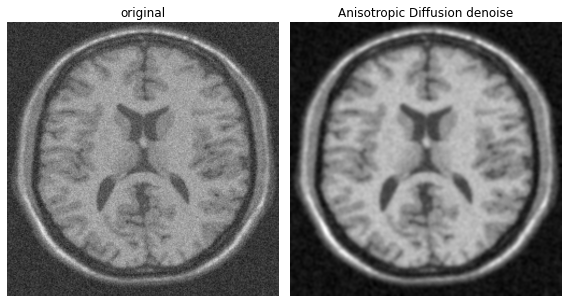

In [10]:
from medpy.filter.smoothing import anisotropic_diffusion

# niter= number of iterations
#kappa = Conduction coefficient (20 to 100)
#gamma = speed of diffusion (<=0.25)
#Option: Perona Malik equation 1 or 2. A value of 3 is for Turkey's biweight function 
img_aniso_filtered = anisotropic_diffusion(noisy_img, niter=50, kappa=50, gamma=0.2, option=2) 

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()
ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[1].imshow(img_aniso_filtered, cmap=plt.cm.gray)
ax[1].set_title('Anisotropic Diffusion denoise')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();

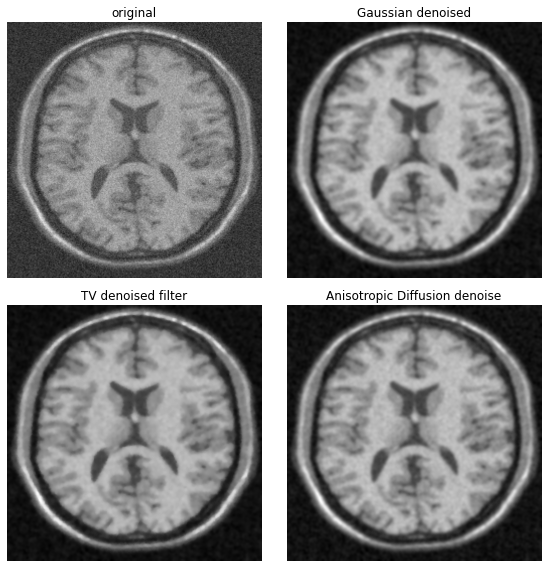

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')

ax[1].imshow(gaussian_img, cmap=plt.cm.gray)
ax[1].set_title('Gaussian denoised')

ax[2].imshow(denoise_TV, cmap=plt.cm.gray)
ax[2].set_title('TV denoised filter')

ax[3].imshow(img_aniso_filtered, cmap=plt.cm.gray)
ax[3].set_title('Anisotropic Diffusion denoise')

for a in ax:
    a.axis('off')
    
plt.tight_layout()
plt.show();

# Non Local Means Denoising (in Skimage)

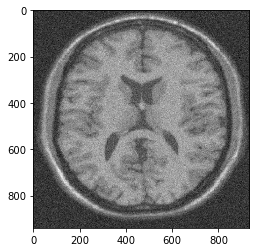

In [13]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float
import numpy as np

sigma_est = np.mean(estimate_sigma(noisy_img, multichannel=False))


NLM_skimg_denoise_img = denoise_nl_means(noisy_img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=9, patch_distance=5, multichannel=False)

denoise_img_as_8byte = img_as_ubyte(NLM_skimg_denoise_img)

#plt.imshow(NLM_skimg_denoise_img)
plt.imshow(denoise_img_as_8byte, cmap=plt.cm.gray, interpolation='nearest');


# BM3D Block-matching and 3D filtering

In [14]:
!{sys.executable} -m pip install bm3d

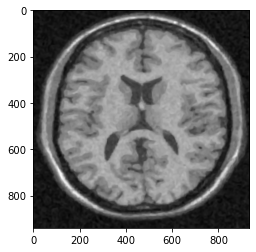

In [15]:
import bm3d

BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.ALL_STAGES)
#BM3D_denoised_image = bm3d.bm3d(noisy_img, sigma_psd=0.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

 #Also try stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING                     

plt.imshow(BM3D_denoised_image, cmap='gray')

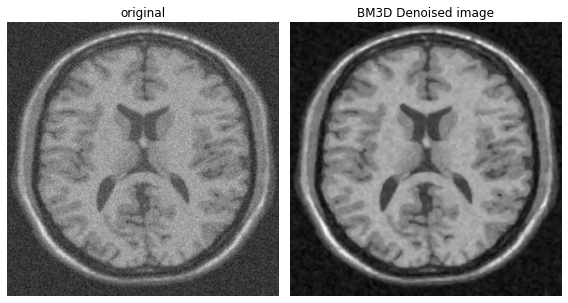

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()
ax[0].imshow(noisy_img, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[1].imshow(BM3D_denoised_image, cmap=plt.cm.gray)
ax[1].set_title('BM3D Denoised image')
for a in ax:
    a.axis('off') 
plt.tight_layout()
plt.show();